In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome,
                           perform_experiments, ema_logging,Policy, MultiprocessingEvaluator)

from ema_workbench import Samplers

from dike_model_function import DikeNetwork  # @UnresolvedImport

from problem_formulation import get_model_for_problem_formulation

from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol

import pickle

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO);

In [3]:
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [4]:
planning_steps

array([0, 1, 2])

In [5]:
uncertainties = dike_model.uncertainties
outcomes = dike_model.outcomes
levers = dike_model.levers

problem = get_SALib_problem(uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


In [6]:
#for unc in dike_model.uncertainties:
#    print(repr(unc))

In [7]:
#for out in dike_model.outcomes:
#    print(repr(out))

In [8]:
for lev in dike_model.levers:
    print(repr(lev.name))

'0_RfR 0'
'0_RfR 1'
'0_RfR 2'
'1_RfR 0'
'1_RfR 1'
'1_RfR 2'
'2_RfR 0'
'2_RfR 1'
'2_RfR 2'
'3_RfR 0'
'3_RfR 1'
'3_RfR 2'
'4_RfR 0'
'4_RfR 1'
'4_RfR 2'
'EWS_DaysToThreat'
'A.1_DikeIncrease 0'
'A.1_DikeIncrease 1'
'A.1_DikeIncrease 2'
'A.2_DikeIncrease 0'
'A.2_DikeIncrease 1'
'A.2_DikeIncrease 2'
'A.3_DikeIncrease 0'
'A.3_DikeIncrease 1'
'A.3_DikeIncrease 2'
'A.4_DikeIncrease 0'
'A.4_DikeIncrease 1'
'A.4_DikeIncrease 2'
'A.5_DikeIncrease 0'
'A.5_DikeIncrease 1'
'A.5_DikeIncrease 2'


In [9]:
def get_0_dict():
    return {l.name: 0 for l in dike_model.levers}

# Creates a Policy object from a dict and a (optional) name
def create_policy(dict1, name=None):
    return Policy(f"Policy_{name}", **dict(get_0_dict(), **dict1))

In [12]:
pol = create_policy({'0_RfR 0': 0,
 '1_RfR 0': 0,
 '2_RfR 0': 0,
 '3_RfR 0': 0,
 '4_RfR 0': 0,
 'EWS_DaysToThreat': 0,
 'A.1_DikeIncrease 0': 0,
 'A.2_DikeIncrease 0': 0,
 'A.3_DikeIncrease 0': 0,
 'A.4_DikeIncrease 0': 0,
 'A.5_DikeIncrease 0': 0,},'Upstream dike, downstream rfr')

In [13]:
pol

Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})

In [20]:
policies = pol
n_exp = 10

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_exp, policies = pol, uncertainty_sampling=Samplers.SOBOL)
        
experiments_sobol, outcomes_sobol = results

[MainProcess/INFO] pool started with 4 workers
/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (10) is equal to `2^n`.
        
  warnings.warn(msg)
[MainProcess/INFO] performing 400 scenarios * 1 policies * 1 model(s) = 400 experiments


  0%|                                                  | 0/400 [00:00<?, ?it/s]

  0%|                                          | 1/400 [00:02<13:47,  2.07s/it]Traceback (most recent call last):
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py", line 246, in _store_outcomes
    self.results[outcome][case_id,] = outcome_res
KeyError: 'Dike Investment Costs'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.

In [65]:
outcomes_sobol['Expected Number of Deaths'] = np.nan_to_num(outcomes_sobol['Expected Number of Deaths'], nan = 3.01437703)

In [66]:
deaths_sobol = sobol.analyze(problem, outcomes_sobol['Expected Number of Deaths'],calc_second_order=True, print_to_console=True)
damages_sobol = sobol.analyze(problem, outcomes_sobol['Expected Annual Damage'],calc_second_order=True, print_to_console=True)

                               ST   ST_conf
A.0_ID flood wave shape  0.001332  0.001919
A.1_Bmax                 0.017724  0.041024
A.1_Brate                0.000597  0.001242
A.1_pfail                0.171320  0.290073
A.2_Bmax                 0.000555  0.001229
A.2_Brate                0.000555  0.001229
A.2_pfail                0.016146  0.024169
A.3_Bmax                 0.009309  0.020600
A.3_Brate                0.000505  0.001118
A.3_pfail                0.954251  0.968864
A.4_Bmax                 0.000555  0.001229
A.4_Brate                0.000555  0.001229
A.4_pfail                0.003220  0.008418
A.5_Bmax                 0.000555  0.001229
A.5_Brate                0.000555  0.001229
A.5_pfail                0.002515  0.007783
discount rate 0          0.000555  0.001229
discount rate 1          0.000555  0.001229
discount rate 2          0.000555  0.001229
                               S1   S1_conf
A.0_ID flood wave shape -0.007839  0.027713
A.1_Bmax                 0.03073

In [67]:
Si_filter = {k:deaths_sobol[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])
Si_df

,ST,ST_conf,S1,S1_conf
A.0_ID flood wave shape,0.001332,0.001919,-0.007839,0.027713
A.1_Bmax,0.017724,0.041024,0.030736,0.050707
A.1_Brate,0.000597,0.001242,0.003058,0.012147
A.1_pfail,0.171320,0.290073,-0.134366,0.448018
A.2_Bmax,0.000555,0.001229,0.005060,0.010994
A.2_Brate,0.000555,0.001229,0.005060,0.010994
A.2_pfail,0.016146,0.024169,0.003648,0.065785
A.3_Bmax,0.009309,0.020600,0.020396,0.045132
A.3_Brate,0.000505,0.001118,0.004753,0.010515
A.3_pfail,0.954251,0.968864,1.192320,1.003632


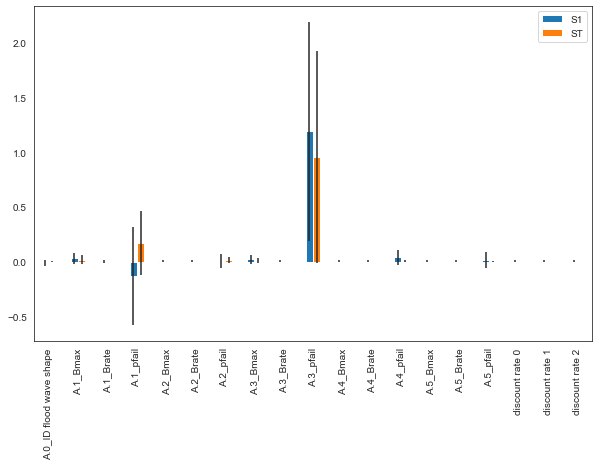

In [68]:
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(10,8)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [55]:
Si_filter = {k:damages_sobol[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])
Si_df

,ST,ST_conf,S1,S1_conf
A.0_ID flood wave shape,1.355844e-03,1.351131e-03,-0.022421,0.040114
A.1_Bmax,3.183257e-02,6.966915e-02,0.061783,0.078516
A.1_Brate,1.585155e-05,4.335865e-05,-0.001355,0.003707
A.1_pfail,5.926600e-01,8.289260e-01,0.372733,0.558956
A.2_Bmax,3.175963e-07,5.069120e-07,-0.000265,0.000756
A.2_Brate,4.339326e-08,1.035863e-07,0.000098,0.000234
A.2_pfail,1.663317e-02,2.223150e-02,-0.104619,0.125480
A.3_Bmax,4.201629e-03,1.108981e-02,-0.002418,0.006394
A.3_Brate,1.048381e-06,2.766933e-06,0.000043,0.000102
A.3_pfail,3.153885e-01,3.782171e-01,0.397512,0.554751


In [ ]:

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(10,8)
fig.subplots_adjust(bottom=0.3)
plt.show()